(470, 18)
(470, 3)
3
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 30)                120       
                                                                 
 dense_93 (Dense)            (None, 1)                 31        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30


/Users/junhyeok/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


47/47 [==============================] - 0s 652us/step - loss: 0.5804 - acc: 0.8511
Epoch 2/30
47/47 [==============================] - 0s 628us/step - loss: 0.5132 - acc: 0.8511
Epoch 3/30
47/47 [==============================] - 0s 616us/step - loss: 0.4745 - acc: 0.8511
Epoch 4/30
47/47 [==============================] - 0s 635us/step - loss: 0.4556 - acc: 0.8511
Epoch 5/30
47/47 [==============================] - 0s 636us/step - loss: 0.4447 - acc: 0.8511
Epoch 6/30
47/47 [==============================] - 0s 666us/step - loss: 0.4373 - acc: 0.8511
Epoch 7/30
47/47 [==============================] - 0s 663us/step - loss: 0.4323 - acc: 0.8511
Epoch 8/30
47/47 [==============================] - 0s 655us/step - loss: 0.4286 - acc: 0.8511
Epoch 9/30
47/47 [==============================] - 0s 650us/step - loss: 0.4255 - acc: 0.8511
Epoch 10/30
47/47 [==============================] - 0s 647us/step - loss: 0.4231 - acc: 0.8511
Epoch 11/30
47/47 [==============================] - 0s 667u

/Users/junhyeok/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 0s 659us/step - loss: 0.7739 - acc: 0.4000
Epoch 2/30
47/47 [==============================] - 0s 683us/step - loss: 0.6432 - acc: 0.7617
Epoch 3/30
47/47 [==============================] - 0s 661us/step - loss: 0.5652 - acc: 0.8383
Epoch 4/30
47/47 [==============================] - 0s 673us/step - loss: 0.5163 - acc: 0.8511
Epoch 5/30
47/47 [==============================] - 0s 682us/step - loss: 0.4860 - acc: 0.8511
Epoch 6/30
47/47 [==============================] - 0s 664us/step - loss: 0.4668 - acc: 0.8511
Epoch 7/30
47/47 [==============================] - 0s 656us/step - loss: 0.4558 - acc: 0.8511
Epoch 8/30
47/47 [==============================] - 0s 672us/step - loss: 0.4486 - acc: 0.8511
Epoch 9/30
47/47 [==============================] - 0s 677us/step - loss: 0.4439 - acc: 0.8511
Epoch 10/30
47/47 [==============================] - 0s 670us/step - loss: 0.4394 - acc: 0.8511
Epoch 11/30
47/47 [==============================] - 0s 655u

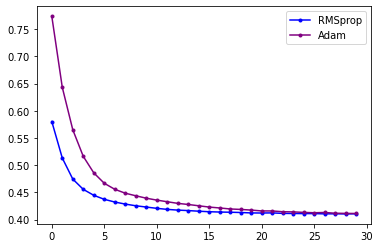

In [31]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

# 불러온 데이터를 적용합니다.
Data_set = np.loadtxt("./dataset/ThoraricSurgery.csv", delimiter=",")


# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
#X = Data_set[:,0:17]
X = Data_set[:,7:10]
Y = Data_set[:,17]
print(Data_set.shape)
print(X.shape)
print(X.shape[1])

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))


print(model.summary())

# 딥러닝을 실행합니다.

# SGD
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['acc'])
history=model.fit(X, Y, epochs=30, batch_size=10)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='red', label="SGD")

# Momentum
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), metrics=['acc'])
history=model.fit(X, Y, epochs=30, batch_size=10)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='orange', label="Momentum")

# NAG
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True), metrics=['acc'])
history=model.fit(X, Y, epochs=30, batch_size=10)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='yellow', label="NAG")

# Adagrad
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6), metrics=['acc'])
history=model.fit(X, Y, epochs=30, batch_size=10)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='green', label="Adagrad")

# RMSprop
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0), metrics=['acc'])
history=model.fit(X, Y, epochs=30, batch_size=10)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="RMSprop")

# Adam
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), metrics=['acc'])
history=model.fit(X, Y, epochs=30, batch_size=10)
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='purple', label="Adam")

plt.legend(loc="upper right")
plt.show()

